## 프로젝트 : 고양이 수염 스티커 만들기

##### 1. 라이브러리 버전 확인

In [263]:
import cv2
import dlib
import matplotlib.pyplot as plt

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.19.0


#### 2. 파일 이미지 가져오기

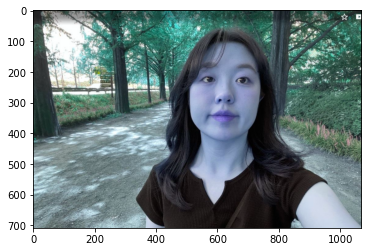

In [264]:
image_path='./image/model.JPG'
img_bgr=cv2.imread(image_path) #opencv로 이미지 불러옴
img_show=img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

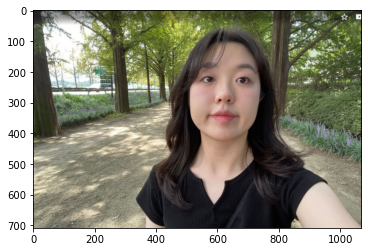

In [265]:
# 이미지 보정 처리
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB) #rgb로 이미지 변환
plt.imshow(img_rgb) 
plt.show()

#### 2. 얼굴 검출 & 랜드마크 검출하기

In [266]:
#dlib을 이용한 hog detector 선어
detector_hog=dlib.get_frontal_face_detector() #기본 얼굴 감지기를 반환

In [267]:
#derector_hog을 이용해 얼굴의 바운딩 박스 추출
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects=detector_hog(img_rgb,1) # rgb 이미지만을 입력으로 받음 , 1은 이미지 피라미드(이미지 업샘플링을 통한 크기를 키우기)

rectangles[[(498, 171) (765, 439)]]


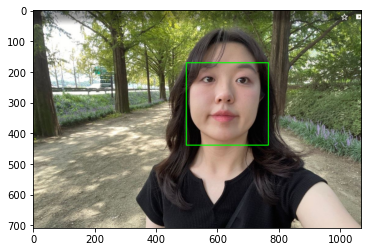

In [268]:
print(dlib_rects) #얼굴 경계 박스

for dlib_rect in dlib_rects: #찾은 얼굴 영역의 좌표
    l=dlib_rect.left() #왼
    r=dlib_rect.right() #오
    t=dlib_rect.top() # 위
    b=dlib_rect.bottom() #아래

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) #시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [269]:
#얼굴 랜드마크 검출, 탑 다운 방식
#랜드마크 불러오기
model_path='./model/shape_predictor_68_face_landmarks.dat'
landmark_predictor=dlib.shape_predictor(model_path)
     #dlib라이브러리의 shape_predictor 함수를 이용해 모델 불러옴
     #landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄


In [270]:
list_landmarks=[]
#랜드마크의 위치를 저장할 리스트 생성

#얼굴 영역 박스마다 페이스 랜드마크를 찾아낸다 , 좌표 저장
for dlib_rect in dlib_rects:
    points=landmark_predictor(img_rgb,dlib_rect)
    #앤드마크 위치정보 포인트 변수에 저장
    list_points=list(map(lambda p: (p.x,p.y),points.parts()))
    #각각의 랜드마크 정보를 x,y 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


list_points-> (x,y)로 튜플로 이루어진 68개 원소

In [271]:
print(len(list_landmarks[1]))

IndexError: list index out of range

list_landmarks 원소가 1개이므로 1을 호출하면 에러가 발생 

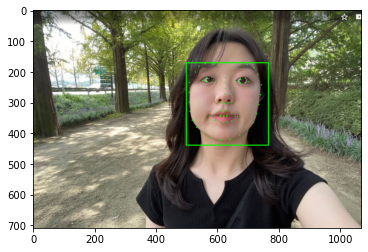

In [272]:
#리스트 랜드마크의 원소가 1개이므로 아래 반복문 한번만 실행 
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,0),-1)
        #img_show 이미지 위 각 포인트 위에 크기가 2이고 색이 255인 내부가 채워진 (-1) 원을 그림

img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 3. 스티커 적용 위치 확인하기

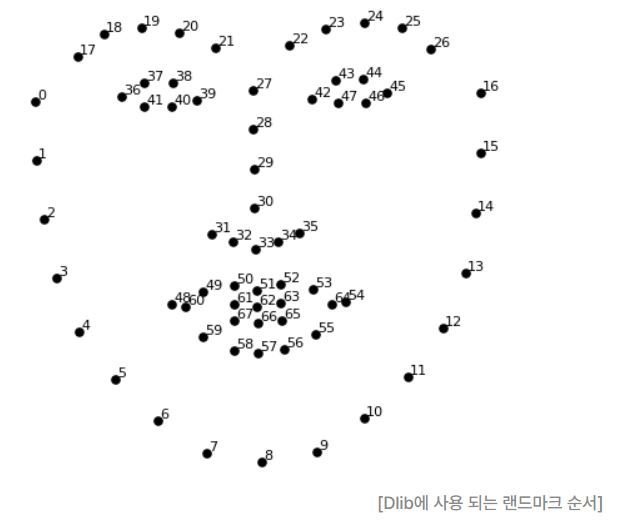

In [273]:
from IPython.display import Image

Image('capture.JPG')

In [274]:
print(list_landmarks)
print(list_landmarks[0][29])
print(list_landmarks[0][30])

[[(508, 235), (507, 267), (508, 299), (510, 329), (517, 358), (532, 381), (553, 399), (579, 414), (609, 422), (641, 420), (672, 408), (698, 391), (717, 366), (727, 337), (734, 307), (739, 275), (742, 243), (527, 201), (539, 182), (560, 174), (583, 175), (605, 182), (651, 187), (672, 178), (696, 177), (718, 187), (730, 209), (625, 220), (625, 237), (625, 254), (624, 273), (600, 299), (611, 301), (623, 303), (634, 302), (646, 300), (551, 228), (565, 219), (581, 218), (594, 231), (579, 234), (563, 233), (660, 232), (674, 222), (690, 221), (702, 232), (690, 237), (674, 236), (574, 344), (593, 335), (609, 327), (620, 330), (630, 326), (646, 335), (665, 346), (646, 360), (630, 364), (619, 365), (607, 363), (591, 358), (581, 344), (609, 342), (620, 343), (630, 342), (657, 346), (630, 345), (620, 346), (609, 345)]]
(625, 254)
(624, 273)


랜드마크의 29번과 30번을 출력시 값이 사진과 비교하여 이목구비 위치를 표시함을 알 수 있다.

랜드마크에서 고양이 수염이 위치할 곳은 
 
x= 코 부분 (인덱스 30)

y= 코와 입술 사이  (인덱스 33과 51 사이)

In [275]:
for dlib_rect, landmark in zip(dlib_rects,list_landmarks): #얼굴 영역과 바운딩박스를 zip 함수로 묶어 반복문 실행
    print(landmark[30]) # 코 인덱스 30
    x=landmark[30][0]
    y=landmark[33][1]-((landmark[33][1]-landmark[51][1])/2)
    w=h=dlib_rect.width() #얼굴 영역 차지하는 픽셀 수 
    print(f'(x,y) : ({x},{y})') 
    print(f'(w,h) : ({w},{h})') 

(624, 273)
(x,y) : (624,316.5)
(w,h) : (268,268)


#### 4. 스티커 위치 적용하기

(268, 268, 3)


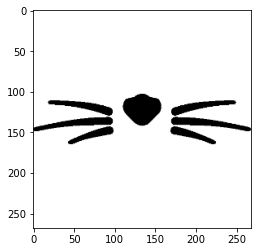

In [276]:
#스티커 이미지 읽어오기
sticker_path='./image/cat.png'
img_sticker=cv2.imread(sticker_path)
img_sticker=cv2.resize(img_sticker,(w,h)) #고양이 이미지 사진에 맞게 재조정 

print(img_sticker.shape) # 고양이 이미지 차원 확인 
plt.imshow(img_sticker)
plt.show()

In [277]:
img_sticker[0]!=0

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [278]:
#x는 이미지에서 코 부위 x: 624
#y는 이미지에서 코 부위 x: 289.5
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 268
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 268

#이미지 시작점 top_left 좌표
refined_x=x-w +134
refined_y=int(y-h) +134  #아래 스티커 area 재정의시 슬라이싱이 정수로만 가능
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (490,182)


In [279]:
import numpy as np

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8) #png이미지이므로 
    

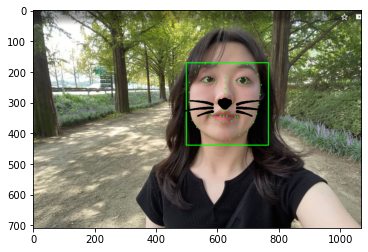

In [280]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

필터 뒤로 원본이 보이게 할 경우 addweight 사용

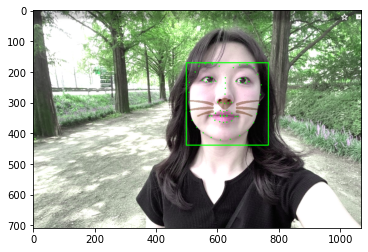

In [295]:
addweight= cv2.addWeighted(img_show_rgb,
                 0.9,
                 img_show,
                 0.5,
                 gamma=0
                 ,dst=None,
                 dtype=None)

plt.imshow(addweight)
plt.show()

addweight 사용하니 기존 이미디의 밝기도 높아졌다

https://deep-learning-study.tistory.com/115

#### 5. 문제점 찾아보기

##### 1. 얼굴 각도에 따라 스티커가 어떻게 변할까?


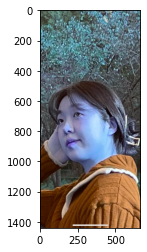

In [304]:
#측면 이미지 불러오기
img2_path='./image/side_face.jpg'
img2=cv2.imread(img2_path)
img2_bgr=img2.copy()
plt.imshow(img2_bgr)
plt.show()

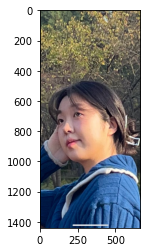

In [305]:
# 이미지 보정 처리
img2_rgb=cv2.cvtColor(img2_bgr,cv2.COLOR_BGR2RGB) #rgb로 이미지 변환
plt.imshow(img2_rgb) 
plt.show()

In [306]:
dlib_rects = detector_hog(img2_rgb, 1)

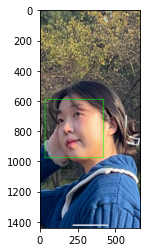

In [307]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img2_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img2_rgb)
plt.show()

68


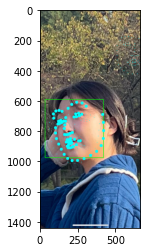

In [312]:
#랜드마크 검출

list2_landmarks=[]

for dlib_rect in dlib_rects:
    points = landmark_predictor(img2_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list2_landmarks.append(list_points)

print(len(list2_landmarks[0]))

for landmark in list2_landmarks:
    for point in landmark:
        cv2.circle(img2_rgb,point,10,(0,255,255),-1)

plt.imshow(img2_rgb)
plt.show()

#### 벡터 사이각 구하기

In [336]:
#기울어진 각도를 구하기 위해 2차원 벡터간의 각도를 구한다.
#사진의 중심점과 코 중심점에 대한 각도를 구하면 될듯?

#벡터간의 사이각 구하기
print(img2_rgb.shape)
print(landmark[30])

middle=np.array([720,333])
nose=np.array([160,782])

import math

def L1_norm(x): #길이 구하는 식 벡터
    x_norm = np.abs(x)
    x_norm = np.sum(x_norm)
    return x_norm


def angle(x, y):
    v = np.inner(x, y) / (L1_norm(x) * L1_norm(y))
    theta = np.arccos(v) #아크코사인을 이용한 세타 반환 
    return theta

theta=angle(middle,nose) #라디안
degree=math.degrees(theta) #도로 변경 
print(degree)

(1440, 666, 3)
(160, 782)
67.74908934939012


67도 만큼 기울어져 있음을 알았다.

In [338]:

for dlib_rect, landmark in zip(dlib_rects,list2_landmarks): #얼굴 영역과 바운딩박스를 zip 함수로 묶어 반복문 실행
    print(landmark[30]) # 코 인덱스 30
    x2=landmark[30][0]
    y2=landmark[33][1]-((landmark[33][1]-landmark[51][1])/2)
    w2=h2=dlib_rect.width() #얼굴 영역 차지하는 픽셀 수 
    print(f'(x,y) : ({x2},{y2})') 
    print(f'(w,h) : ({w2},{h2})') 

sticker_path='./image/cat.png'
img2_sticker=cv2.imread(sticker_path)
img2_sticker=cv2.resize(img2_sticker,(w2,h2))

print(img2_sticker.shape)


(160, 782)
(x,y) : (160,838.5)
(w,h) : (386,386)
(386, 386, 3)


In [339]:
refined_x2=x2-w2 +134
refined_y2=int(y2-h2) +134  #아래 스티커 area 재정의시 슬라이싱이 정수로만 가능
print (f'(x,y) : ({refined_x2},{refined_y2})')

(x,y) : (-92,586)


In [343]:

if refined_x2 < 0: 
    img2_sticker = img2_sticker[:, -refined_x2:]
    refined_x2 = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y2 < 0:
    img2_sticker = img2_sticker[-refined_y2:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y2 = 0

print (f'(x,y) : ({refined_x2},{refined_y2})')

(x,y) : (0,586)


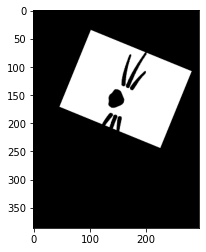

In [353]:


cp = (w // 2, h // 2) # 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, degree, 0.5)
dst = cv2.warpAffine(img2_sticker, rot, (0, 0))
plt.imshow(dst)
plt.show()

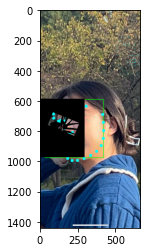

In [354]:
sticker2_area = img2_rgb[refined_y2:refined_y2+img2_sticker.shape[0], refined_x2:refined_x2+img2_sticker.shape[1]]

img2_rgb[refined_y2:refined_y2+img2_sticker.shape[0], refined_x2:refined_x2+img2_sticker.shape[1]] = \
    np.where(dst!=0,sticker2_area,dst).astype(np.uint8) 

plt.imshow(img2_rgb)
plt.show()

회전은 했는데 회전하며서 부과적인 공간이 생겨서 스티커 배경이 제거되지 않는다..

알파 채널을 추가하여 하는 방법도 있으나 시간이 없어서 먼저 제출하고 해보겠습니다 ㅜㅜ